In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ast
import cv2
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16,ResNet50


**1.Carga csv**

Se sacan las coordenadas de las regiones de interés de las imágenes del video 7


In [2]:
file_path = 'C:/Users/andre/Downloads/csv_final_video7.csv'
df = pd.read_csv(file_path)

df.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,surco-rouviere-244.jpg,102026,{},3,0,"{""name"":""rect"",""x"":298,""y"":192,""width"":336,""he...","{""Region"":""vesicula""}"
1,surco-rouviere-244.jpg,102026,{},3,1,"{""name"":""rect"",""x"":259,""y"":367,""width"":135,""he...","{""Region"":""surco""}"
2,surco-rouviere-244.jpg,102026,{},3,2,"{""name"":""rect"",""x"":519,""y"":55,""width"":179,""hei...","{""Region"":""segmento4""}"
3,surco-rouviere-326.jpg,108379,{},3,0,"{""name"":""rect"",""x"":298,""y"":64,""width"":233,""hei...","{""Region"":""vesicula""}"
4,surco-rouviere-326.jpg,108379,{},3,1,"{""name"":""rect"",""x"":142,""y"":250,""width"":170,""he...","{""Region"":""surco""}"


In [3]:
# Asegurarnos de que la columna 'label' exista
df['label'] = df['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

df[['filename', 'label']].head()

,filename,label
0,surco-rouviere-244.jpg,vesicula
1,surco-rouviere-244.jpg,surco
2,surco-rouviere-244.jpg,segmento4
3,surco-rouviere-326.jpg,vesicula
4,surco-rouviere-326.jpg,surco


In [4]:
# Función para convertir las coordenadas del formato JSON a (x_min, y_min, x_max, y_max)
def convert_to_bounding_box(region_shape_attributes):
    shape_dict = ast.literal_eval(region_shape_attributes)
    x_min = shape_dict['x']
    y_min = shape_dict['y']
    x_max = x_min + shape_dict['width']
    y_max = y_min + shape_dict['height']
    return x_min, y_min, x_max, y_max

In [5]:


# Aplicar la función a cada fila del DataFrame y extraer las coordenadas
df['x_min'], df['y_min'], df['x_max'], df['y_max'] = zip(*df['region_shape_attributes'].map(convert_to_bounding_box))

# Asegurarnos de que la columna 'label' existe (si no se ha creado anteriormente)
df['label'] = df['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

# Ahora que las columnas 'x_min', 'y_min', 'x_max', 'y_max', y 'label' están en el DataFrame,
df[['filename', 'x_min', 'y_min', 'x_max', 'y_max', 'label']].head()

,filename,x_min,y_min,x_max,y_max,label
0,surco-rouviere-244.jpg,298,192,634,426,vesicula
1,surco-rouviere-244.jpg,259,367,394,475,surco
2,surco-rouviere-244.jpg,519,55,698,210,segmento4
3,surco-rouviere-326.jpg,298,64,531,470,vesicula
4,surco-rouviere-326.jpg,142,250,312,420,surco


In [6]:
array_filename= df['filename'].unique()

In [7]:
array_filename.shape

(61,)

In [8]:
df.shape

(182, 12)

**Carga csv 2**

Se sacan las coordenadas de las regiones de interés de las imágenes del video 2

In [9]:
file_path2 = './via_export_csv_final.csv'
df2 = pd.read_csv(file_path2)

df2.head()


,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,frame_15090.jpg,115668,{},3,0,"{""name"":""rect"",""x"":476,""y"":138,""width"":153,""he...","{""Region"":""vesicula""}"
1,frame_15090.jpg,115668,{},3,1,"{""name"":""rect"",""x"":338,""y"":277,""width"":132,""he...","{""Region"":""surco""}"
2,frame_15090.jpg,115668,{},3,2,"{""name"":""rect"",""x"":638,""y"":234,""width"":120,""he...","{""Region"":""segmento4""}"
3,frame_15103.jpg,128711,{},3,0,"{""name"":""rect"",""x"":454,""y"":145,""width"":143,""he...","{""Region"":""vesicula""}"
4,frame_15103.jpg,128711,{},3,1,"{""name"":""rect"",""x"":370,""y"":305,""width"":166,""he...","{""Region"":""surco""}"


In [10]:
# Asegurarnos de que la columna 'label' exista
df2['label'] = df2['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

df2[['filename', 'label']].head()


,filename,label
0,frame_15090.jpg,vesicula
1,frame_15090.jpg,surco
2,frame_15090.jpg,segmento4
3,frame_15103.jpg,vesicula
4,frame_15103.jpg,surco


In [11]:
# Aplicar la función a cada fila del DataFrame y extraer las coordenadas
df2['x_min'], df2['y_min'], df2['x_max'], df2['y_max'] = zip(*df2['region_shape_attributes'].map(convert_to_bounding_box))

# Asegurarnos de que la columna 'label' existe (si no se ha creado anteriormente)
df2['label'] = df2['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

# Ahora que las columnas 'x_min', 'y_min', 'x_max', 'y_max', y 'label' están en el DataFrame,
df2[['filename', 'x_min', 'y_min', 'x_max', 'y_max', 'label']].head()


,filename,x_min,y_min,x_max,y_max,label
0,frame_15090.jpg,476,138,629,475,vesicula
1,frame_15090.jpg,338,277,470,446,surco
2,frame_15090.jpg,638,234,758,382,segmento4
3,frame_15103.jpg,454,145,597,468,vesicula
4,frame_15103.jpg,370,305,536,439,surco


In [12]:
array_filename2= df2['filename'].unique()
array_filename2.shape

(835,)

In [13]:
df2.shape

(2505, 12)

In [14]:
merged_df = pd.concat([df, df2], ignore_index=True)
merged_df.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,label,x_min,y_min,x_max,y_max
0,surco-rouviere-244.jpg,102026,{},3,0,"{""name"":""rect"",""x"":298,""y"":192,""width"":336,""he...","{""Region"":""vesicula""}",vesicula,298,192,634,426
1,surco-rouviere-244.jpg,102026,{},3,1,"{""name"":""rect"",""x"":259,""y"":367,""width"":135,""he...","{""Region"":""surco""}",surco,259,367,394,475
2,surco-rouviere-244.jpg,102026,{},3,2,"{""name"":""rect"",""x"":519,""y"":55,""width"":179,""hei...","{""Region"":""segmento4""}",segmento4,519,55,698,210
3,surco-rouviere-326.jpg,108379,{},3,0,"{""name"":""rect"",""x"":298,""y"":64,""width"":233,""hei...","{""Region"":""vesicula""}",vesicula,298,64,531,470
4,surco-rouviere-326.jpg,108379,{},3,1,"{""name"":""rect"",""x"":142,""y"":250,""width"":170,""he...","{""Region"":""surco""}",surco,142,250,312,420


In [15]:
merged_df.tail()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,label,x_min,y_min,x_max,y_max
2682,frame_7775.jpg,105868,{},3,1,"{""name"":""rect"",""x"":314,""y"":334,""width"":123,""he...","{""Region"":""surco""}",surco,314,334,437,402
2683,frame_7775.jpg,105868,{},3,2,"{""name"":""rect"",""x"":542,""y"":222,""width"":68,""hei...","{""Region"":""segmento4""}",segmento4,542,222,610,293
2684,frame_7786.jpg,103277,{},3,0,"{""name"":""rect"",""x"":372,""y"":13,""width"":132,""hei...","{""Region"":""vesicula""}",vesicula,372,13,504,325
2685,frame_7786.jpg,103277,{},3,1,"{""name"":""rect"",""x"":292,""y"":321,""width"":127,""he...","{""Region"":""surco""}",surco,292,321,419,407
2686,frame_7786.jpg,103277,{},3,2,"{""name"":""rect"",""x"":540,""y"":240,""width"":74,""hei...","{""Region"":""segmento4""}",segmento4,540,240,614,295


In [16]:
merged_df.shape

(2687, 12)

In [17]:
print(len(merged_df['filename'].unique()))

896


**Cargar Imágenes**

In [18]:
class_folders = [
        'antes-cirugia-grande',
        'durante-cirugia',
        'despues-cirugia-grande'
]

In [19]:
def ensure_directory_exists(directory):
    """
    Crea el directorio si no existe.
    
    Parámetros:
    -----------
    directory : str
        La ruta del directorio.
    """
    if not os.path.exists(directory):
        os.makedirs(directory)

In [20]:
def get_image_filenames(image_dirs):
    """
    Obtiene los nombres de los archivos de imagen .jpg de múltiples directorios.
    
    Parámetros:
    -----------
    image_dirs : list
        Lista de rutas de los directorios que contienen las imágenes.
        
    Retorno:
    --------
    list : Lista de nombres de archivos .jpg.
    """
    image_filenames = []
    for image_dir in image_dirs:
        image_filenames += [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    return image_filenames

**Procesamiento de la imágenes**

Se redimensionan a un tamaño de 224x224,se normalizan y adicionamente se obtienen las coordenadas de cada región de la imagen

In [21]:
def read_imageResize_with_labels(df, image_dirs, target_size=(224, 224)):
    """
    Lee imágenes de múltiples directorios, las redimensiona a 224x224 píxeles y las etiqueta según 
    los valores en el DataFrame. Las imágenes son procesadas en RGB.

    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame que contiene la información de las imágenes y coordenadas.
    image_dirs : list
        Lista de rutas de los directorios que contienen las imágenes.
    target_size : tuple, opcional
        Tamaño al que se redimensionarán las imágenes. Por defecto es (224, 224).

    Retorno:
    --------
    tuple: 
        - np.array: Un array de NumPy con las imágenes redimensionadas.
        - dict: Un diccionario con los bounding boxes y las etiquetas correspondientes a las imágenes.
    """
    images_now = []
    bbox_targets = []
    class_targets = []

    # Obtener todos los nombres de archivo de las imágenes de los directorios especificados
    image_filenames = get_image_filenames(image_dirs)

    # Procesar cada imagen en la lista de archivos
    for name_image in image_filenames:
        # Obtener la ruta completa de la imagen
        image_path = None
        for image_dir in image_dirs:
            possible_path = os.path.join(image_dir, name_image)
            if os.path.exists(possible_path):
                image_path = possible_path
                break

        if image_path is None:
            print(f"Error: No se pudo encontrar la imagen {name_image}")
            continue

        # Leer y procesar la imagen
        image = cv2.imread(image_path)
        if image is None:
            print(f"Advertencia: No se pudo leer la imagen {image_path}")
            continue

        height, width = image.shape[:2]
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)
        image = image / 255.0

        # Buscar en el DataFrame las etiquetas correspondientes a esta imagen
        df_image = df[df['filename'] == name_image]

        # Verificar si hay regiones en la imagen
        if df_image.empty:
            # Imagen sin regiones: asignar etiquetas de una nueva clase "sin regiones" (ejemplo: clase 3)
            bboxes = [[0, 0, 0, 0] for _ in range(3)]
            labels = [3 for _ in range(3)]  
        else:
            # Imagen con regiones: procesar normalmente
            bboxes = []
            labels = []
            for _, row in df_image.iterrows():
                label_map = {'vesicula': 0, 'surco': 1, 'segmento4': 2}
                label = label_map.get(row['label'], 3)  # Clase especial "sin regiones" si no es válida
                x_scale = target_size[0] / width
                y_scale = target_size[1] / height

                x_min = row['x_min'] * x_scale
                y_min = row['y_min'] * y_scale
                x_max = row['x_max'] * x_scale
                y_max = row['y_max'] * y_scale

                bbox = [x_min, y_min, x_max, y_max]
                bboxes.append(bbox)
                labels.append(label)

            # Asegurarse de que cada imagen tenga 3 regiones, si no, rellenar con valores vacíos
            while len(bboxes) < 3:
                bboxes.append([0, 0, 0, 0])  # Cuadro delimitador vacío
                labels.append(3)  # Asignar clase especial "sin regiones"

        images_now.append(image)
        bbox_targets.append(bboxes)
        class_targets.append(tf.keras.utils.to_categorical(labels, num_classes=4))  # 4 clases ahora (0, 1, 2, 3)

    images_now = np.array(images_now)
    bbox_targets = np.array(bbox_targets)
    class_targets = np.array(class_targets)

    return images_now, {"bounding_box": bbox_targets, "class_label": class_targets}


In [22]:

images, targets = read_imageResize_with_labels(merged_df,image_dirs=class_folders)



In [23]:

print(f"Número de imágenes: {images.shape[0]}")
print(f"Tamaño de cada imagen: {images.shape[1:]}")

# Verificar las etiquetas
primera_llave = next(iter(targets))
primer_valor = targets[primera_llave]


Número de imágenes: 2984
Tamaño de cada imagen: (224, 224, 3)


In [24]:
print(type(images[0]))

<class 'numpy.ndarray'>


In [25]:
def inspect_random_targets(targets, num_items=5):
    """
    Inspecciona 'num_items' elementos aleatorios de targets para visualizar 
    los bounding boxes y las etiquetas de clase.
    
    Parámetros:
    ----------
    targets : dict
        Diccionario que contiene 'bounding_box' y 'class_label'.
    num_items : int, opcional
        Número de elementos a visualizar.
    """
    bounding_boxes = targets['bounding_box']
    class_labels = targets['class_label']
    

    random_indices = np.random.choice(len(bounding_boxes), num_items, replace=False)
    
    for i in random_indices:
        print(f"--- Imagen {i+1} ---")
        
        print(f"Bounding Boxes (imagen {i+1}):")
        for bbox in bounding_boxes[i]:
            print(f"x_min: {bbox[0]}, y_min: {bbox[1]}, x_max: {bbox[2]}, y_max: {bbox[3]}")
        
        print(f"Class Labels (imagen {i+1}):")
        for label in class_labels[i]:
            label_index = np.argmax(label)
            # Ajusta el nombre para la clase especial 3
            if label_index == 3:
                label_name = 'sin regiones'
            else:
                label_name = 'vesicula' if label_index == 0 else ('surco' if label_index == 1 else 'segmento4')
                
            print(f"Label: {label_index} ({label_name})")
        
        print("\n")


In [26]:

inspect_random_targets(targets, num_items=3)

--- Imagen 891 ---
Bounding Boxes (imagen 891):
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
Class Labels (imagen 891):
Label: 3 (sin regiones)
Label: 3 (sin regiones)
Label: 3 (sin regiones)


--- Imagen 1067 ---
Bounding Boxes (imagen 1067):
x_min: 85.77049180327869, y_min: 44.8, x_max: 177.31147540983608, y_max: 151.2
x_min: 133.5081967213115, y_min: 147.46666666666667, x_max: 153.96721311475412, y_max: 202.06666666666666
x_min: 183.08196721311475, y_min: 75.13333333333334, x_max: 200.13114754098362, y_max: 134.4
Class Labels (imagen 1067):
Label: 0 (vesicula)
Label: 1 (surco)
Label: 2 (segmento4)


--- Imagen 243 ---
Bounding Boxes (imagen 243):
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
Class Labels (imagen 243):
Label: 3 (sin regiones)
Label: 3 (sin regiones)
Label: 3 (sin regiones)




In [27]:
import os
destination_directory = './durante-cirugia/' 
# Lista de imágenes en el directorio
images_in_directory = set(os.listdir(destination_directory))

# Lista de imágenes en el DataFrame
images_in_dataframe = set(merged_df['filename'].unique())

# Imágenes que están en el directorio pero no en el DataFrame
missing_in_dataframe = images_in_directory - images_in_dataframe

# Imágenes que están en el DataFrame pero no en el directorio
missing_in_directory = images_in_dataframe - images_in_directory

# Mostrar los resultados
print(f"Imágenes en el directorio pero no en el DataFrame: {len(missing_in_dataframe)}")


print(f"Imágenes en el DataFrame pero no en el directorio: {len(missing_in_directory)}")



Imágenes en el directorio pero no en el DataFrame: 84
Imágenes en el DataFrame pero no en el directorio: 0


In [28]:
print(images.shape)

(2984, 224, 224, 3)


In [29]:
def visualize_bounding_boxes(images, targets, num_images=5, columns=2):
    """
    Visualiza un número determinado de imágenes con sus correspondientes cuadros delimitadores
    y etiquetas de clase. No dibuja cuadros ni etiquetas si la clase es inválida (-1 o 3).

    Parámetros:
    -----------
    images : numpy.ndarray
        Array de imágenes.
    targets : dict
        Diccionario que contiene los cuadros delimitadores ('bounding_box') y etiquetas ('class_label').
    num_images : int, opcional
        Número de imágenes a visualizar.
    columns : int, opcional
        Número de columnas en la visualización de subplots.
    """

    
    random_indices = np.random.choice(len(images), num_images, replace=False)

    # Definir el número de filas en función del número de imágenes y columnas
    rows = (num_images + columns - 1) // columns

    # Crear subplots
    fig, axes = plt.subplots(rows, columns, figsize=(15, 5 * rows))
    axes = axes.flatten()  

    for idx, i in enumerate(random_indices):
        ax = axes[idx]
        ax.imshow(images[i])
        bbox_list = targets['bounding_box'][i]
        class_list = targets['class_label'][i]

        for bbox, class_label in zip(bbox_list, class_list):
            label = np.argmax(class_label)

            # Si la etiqueta es -1 o 3 (sin regiones), no dibujar cuadros
            if label == -1 or label == 3:
                continue  


            color = 'red' if label == 0 else ('blue' if label == 1 else 'green')
            label_name = 'vesicula' if label == 0 else ('surco' if label == 1 else 'segmento4')


            ax.add_patch(plt.Rectangle(
                (bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1],
                edgecolor=color, facecolor='none', linewidth=2))

            # Añadir el texto de la etiqueta
            ax.text(bbox[0], bbox[1] - 10, f"{label_name}", color=color, fontsize=12,
                    bbox=dict(facecolor='yellow', alpha=0.5))
        
        ax.axis('off')  

    # Eliminar los subplots vacíos si el número de imágenes es menor que los subplots creados
    for idx in range(num_images, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()



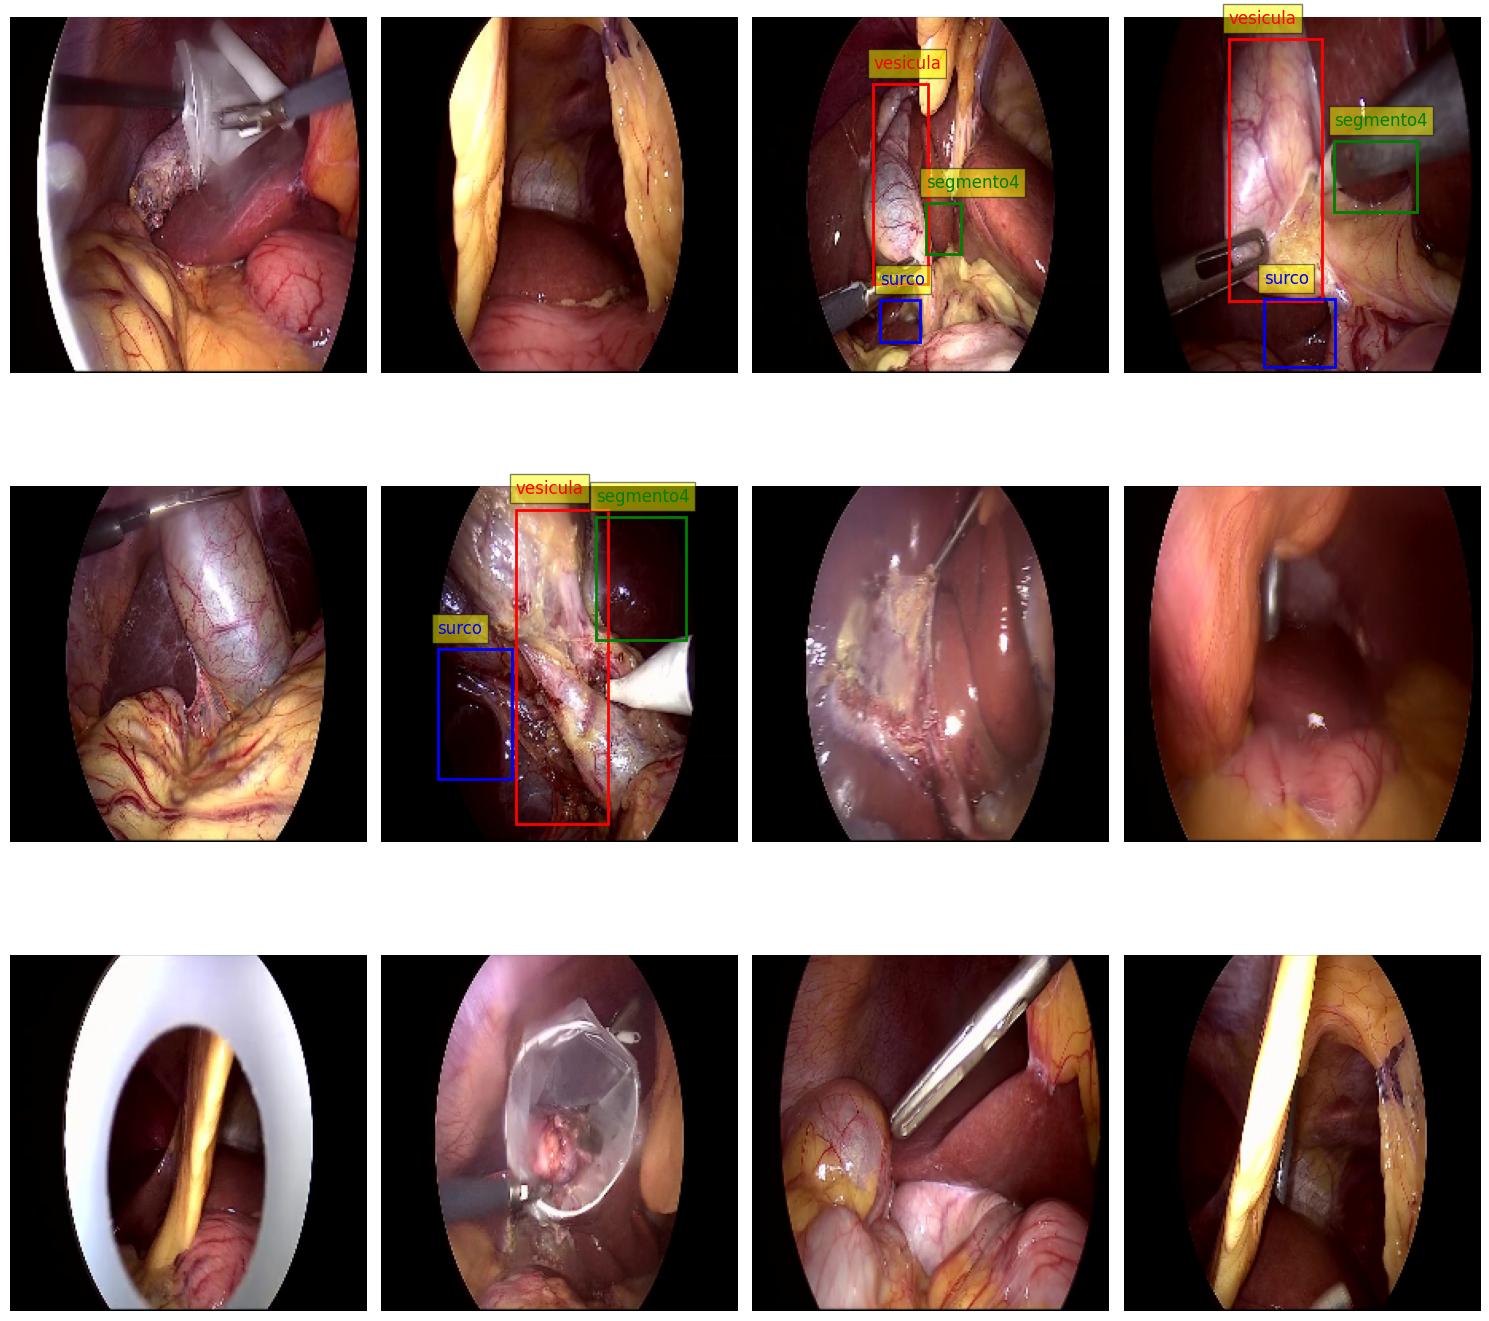

In [30]:
visualize_bounding_boxes(images, targets, num_images=12, columns=4)

**División train-test**

In [31]:
from sklearn.model_selection import train_test_split

# Suponiendo que 'images' es el array de imágenes y 'targets' es un diccionario con bounding boxes y class labels
bounding_boxes = targets['bounding_box']
class_labels = targets['class_label']


# División en 80% para entrenamiento y 20% para validación
X_train, X_val, bbox_train, bbox_val, class_train, class_val = train_test_split(
    images, bounding_boxes, class_labels, test_size=0.2, random_state=42
)

# Creamos diccionarios para los targets de entrenamiento y validación
train_targets = {
    'bounding_box': bbox_train,
    'class_label': class_labels
}

val_targets = {
    'bounding_box': bbox_val,
    'class_label': class_labels
}


print(f'Conjunto de entrenamiento: {len(X_train)} imágenes, {len(train_targets["bounding_box"])} bounding boxes')
print(f'Conjunto de validación: {len(X_val)} imágenes, {len(val_targets["bounding_box"])} bounding boxes')
print(f"Shape train {class_labels.shape}")

Conjunto de entrenamiento: 2387 imágenes, 2387 bounding boxes
Conjunto de validación: 597 imágenes, 597 bounding boxes
Shape train (2984, 3, 4)


In [32]:
np.array(train_targets['bounding_box']).shape


(2387, 3, 4)

In [33]:
np.array(val_targets['bounding_box']).shape

(597, 3, 4)

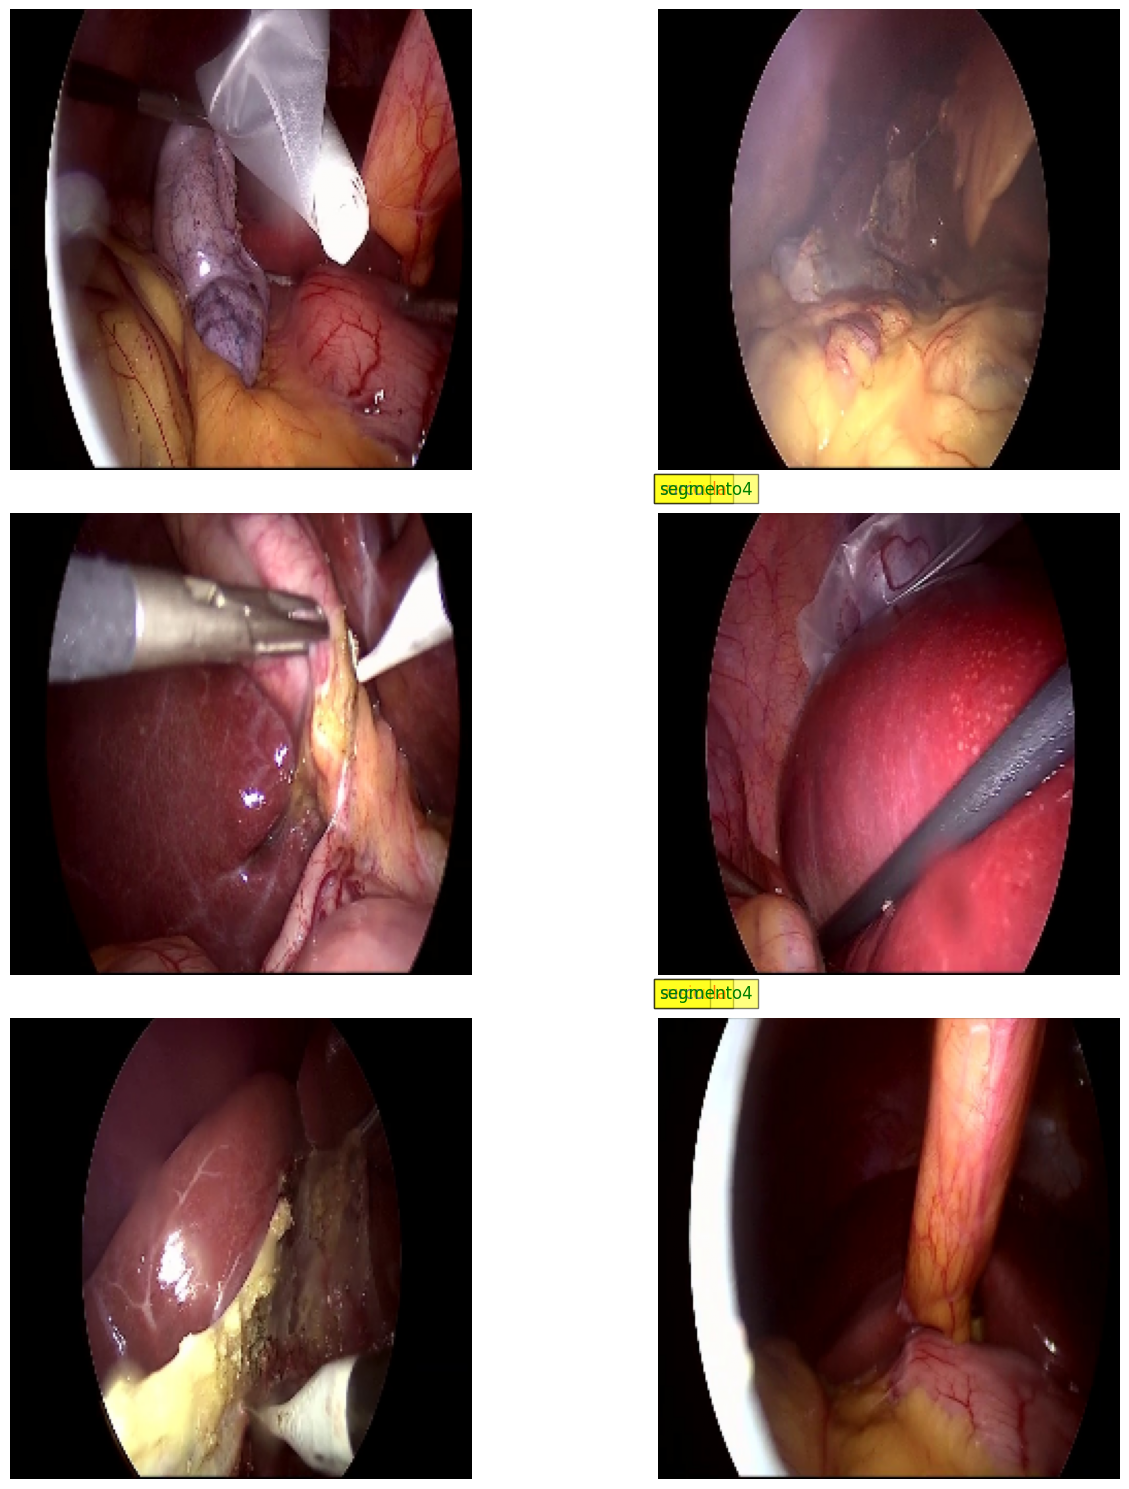

In [34]:
visualize_bounding_boxes(X_train,train_targets,6,2)

In [35]:
def normalize_bounding_boxes(bboxes, image_width, image_height):
    """
    Normaliza los bounding boxes para que estén en el rango [0, 1].
    
    Parámetros:
    -----------
    bboxes : np.array
        Array con los bounding boxes (x_min, y_min, x_max, y_max).
    image_width : int
        Ancho de la imagen.
    image_height : int
        Alto de la imagen.
        
    Retorno:
    --------
    np.array : Bounding boxes normalizados.
    """
    bboxes[:, :, [0, 2]] /= image_width  
    bboxes[:, :, [1, 3]] /= image_height  
    return bboxes


In [36]:

image_width = 224
image_height = 224

train_targets['bounding_box'] = normalize_bounding_boxes(train_targets['bounding_box'], image_width, image_height)


val_targets['bounding_box'] = normalize_bounding_boxes(val_targets['bounding_box'], image_width, image_height)


In [37]:
print(np.min(train_targets['bounding_box']), np.max(train_targets['bounding_box']))
print(np.min(val_targets['bounding_box']), np.max(val_targets['bounding_box']))


0.0 1.0
0.0 0.9979166666666667


In [38]:
train_targets['bounding_box'] = np.array(train_targets['bounding_box'])


val_targets['bounding_box'] = np.array(val_targets['bounding_box'])



**Resumen del modelo entrenado**

In [39]:
# Verificar que TensorFlow detecta la GPU
print("GPUs disponibles: ", tf.config.list_physical_devices('GPU'))


GPUs disponibles:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [40]:

# Métrica personalizada IoU
def iou_metric(y_true, y_pred):
    def box_area(box):
        return (box[..., 2] - box[..., 0]) * (box[..., 3] - box[..., 1])

    true_area = box_area(y_true)
    pred_area = box_area(y_pred)

    x_min = tf.maximum(y_true[..., 0], y_pred[..., 0])
    y_min = tf.maximum(y_true[..., 1], y_pred[..., 1])
    x_max = tf.minimum(y_true[..., 2], y_pred[..., 2])
    y_max = tf.minimum(y_true[..., 3], y_pred[..., 3])

    intersection_area = tf.maximum(0.0, x_max - x_min) * tf.maximum(0.0, y_max - y_min)
    union_area = true_area + pred_area - intersection_area

    return intersection_area / union_area




In [53]:
def iou_loss(y_true, y_pred):
    """
    Calcula el IoU Loss entre los bounding boxes predichos y los verdaderos.
    
    Parámetros:
    -----------
    y_true : tensor
        Bounding boxes verdaderos (formato: [x_min, y_min, x_max, y_max]).
    y_pred : tensor
        Bounding boxes predichos (formato: [x_min, y_min, x_max, y_max]).
    
    Retorno:
    --------
    iou_loss : tensor
        Pérdida basada en la métrica IoU.
    """
    x_min_true, y_min_true, x_max_true, y_max_true = tf.split(y_true, 4, axis=-1)
    x_min_pred, y_min_pred, x_max_pred, y_max_pred = tf.split(y_pred, 4, axis=-1)

    # Calcular el área de los cuadros verdaderos y predichos
    area_true = (x_max_true - x_min_true) * (y_max_true - y_min_true)
    area_pred = (x_max_pred - x_min_pred) * (y_max_pred - y_min_pred)

    # Calcular las coordenadas de la intersección
    x_min_inter = tf.maximum(x_min_true, x_min_pred)
    y_min_inter = tf.maximum(y_min_true, y_min_pred)
    x_max_inter = tf.minimum(x_max_true, x_max_pred)
    y_max_inter = tf.minimum(y_max_true, y_max_pred)

    inter_area = tf.maximum((x_max_inter - x_min_inter), 0) * tf.maximum((y_max_inter - y_min_inter), 0)

    # Calcular el área de unión
    union_area = area_true + area_pred - inter_area

    # Calcular IoU
    iou = inter_area / tf.maximum(union_area, 1e-10)

    # El IoU Loss es 1 - IoU
    return 1 - iou

In [68]:

from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU, Add, Concatenate, UpSampling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Reshape, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Bloque convolucional básico con opción de residual
def conv_block(x, filters, kernel_size=(3, 3), strides=(1, 1), use_residual=False):
    shortcut = x
    x = Conv2D(filters, kernel_size, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    
    if use_residual:
        shortcut = Conv2D(filters, (1, 1), strides=strides, padding='same')(shortcut)
        x = Add()([x, shortcut])
    
    return x

# Bloque convolucional con dilatación para aumentar el campo de visión sin perder resolución
def dilated_block(x, filters, dilation_rate=2):
    x = Conv2D(filters, (3, 3), padding='same', dilation_rate=dilation_rate)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    return x

In [70]:
def create_custom_detection_model(input_shape=(224, 224, 3), num_bboxes=3):
    """

    """
    image_input = Input(shape=input_shape, name='image_input')

    # Bloques convolucionales iniciales
    x = conv_block(image_input, 32)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Bloques residuales más sencillos
    x = conv_block(x, 64, use_residual=True)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = conv_block(x, 128, use_residual=True)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Bloque dilatado para capturar información espacial amplia
    x = dilated_block(x, 256, dilation_rate=2)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Bloque convolucional final
    x = conv_block(x, 512, use_residual=True)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Aplanar para pasar a capas densas
    x = Flatten()(x)

    # Capa completamente conectada para aprender características más complejas
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Salida para los bounding boxes
    bounding_box = Dense(num_bboxes * 4, activation='linear')(x)
    bounding_box = Reshape((num_bboxes, 4), name='bounding_box')(bounding_box)

    # Crear el modelo
    model = Model(inputs=image_input, outputs=[bounding_box])

    
    # Compilar el modelo usando IoU como métrica
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss={'bounding_box': iou_loss},
                  metrics={'bounding_box': [iou_metric, 'mse']})

    model.summary()
    return model



In [71]:
model = create_custom_detection_model()



Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image_input (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_46 (Conv2D)             (None, 224, 224, 32  896         ['image_input[0][0]']            
                                )                                                                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 224, 224, 32  128        ['conv2d_46[0][0]']              
 ormalization)                  )                                                           

In [72]:
print(model.output_names)

['bounding_box']


In [73]:
# Entrenar el modelo
history = model.fit(
    X_train,  
    train_targets['bounding_box'],  
    validation_data=(X_val, val_targets['bounding_box']),  
    epochs=20,  
    batch_size=32  
)

Epoch 1/20
75/75 [==============================] - 14s 150ms/step - loss: 1.0000 - iou_metric: 9.1505e-06 - mse: 516.4634 - val_loss: 1.0000 - val_iou_metric: 0.0000e+00 - val_mse: 19.9663
Epoch 2/20
75/75 [==============================] - 9s 121ms/step - loss: 1.0000 - iou_metric: 0.0000e+00 - mse: 641.7799 - val_loss: 1.0000 - val_iou_metric: 0.0000e+00 - val_mse: 51.2223
Epoch 3/20
75/75 [==============================] - 9s 122ms/step - loss: 1.0000 - iou_metric: 0.0000e+00 - mse: 634.8480 - val_loss: 1.0000 - val_iou_metric: 0.0000e+00 - val_mse: 85.8254
Epoch 4/20
75/75 [==============================] - 9s 121ms/step - loss: 1.0000 - iou_metric: 0.0000e+00 - mse: 636.8483 - val_loss: 1.0000 - val_iou_metric: 0.0000e+00 - val_mse: 126.3713
Epoch 5/20
75/75 [==============================] - 9s 120ms/step - loss: 1.0000 - iou_metric: 0.0000e+00 - mse: 636.4554 - val_loss: 1.0000 - val_iou_metric: 0.0000e+00 - val_mse: 177.1830
Epoch 6/20
39/75 [==============>...............] - 

ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/model_2/dense_4/MatMul/MatMul' defined at (most recent call last):
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
      result = self._run_cell(
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
      result = runner(coro)
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\andre\AppData\Local\Temp\ipykernel_8292\858404899.py", line 2, in <module>
      history = model.fit(
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 576, in minimize
      grads_and_vars = self._compute_gradients(
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 634, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "c:\Users\andre\anaconda3\envs\tf_gpu\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 510, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/model_2/dense_4/MatMul/MatMul'
OOM when allocating tensor with shape[32,25088] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/model_2/dense_4/MatMul/MatMul}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_36860]

In [54]:
# Evaluar el modelo en el conjunto de validación
evaluation_results = model.evaluate(
    X_val,  # Imágenes de validación
    val_targets['bounding_box'],  # Bounding boxes de validación
    batch_size=32  # Tamaño del batch
)

# Imprimir las métricas
print(f"Resultados de la evaluación: {model.metrics_names}")
print(f"Valores de evaluación: {evaluation_results}")


19/19 [==============================] - 1s 46ms/step - loss: 0.0089 - iou_metric: 0.0773 - mse: 0.0089
Resultados de la evaluación: ['loss', 'iou_metric', 'mse']
Valores de evaluación: [0.008905378170311451, 0.07731671631336212, 0.008905377238988876]


In [55]:
# Realizar predicciones en el conjunto de validación
pred_bboxes = model.predict(X_val)

# Imprimir algunas predicciones y las etiquetas verdaderas
print("Predicciones de bounding boxes para la primera imagen:")
print(pred_bboxes[112])  # Bounding boxes predichos para la primera imagen

print("Bounding boxes verdaderos para la primera imagen:")
print(val_targets['bounding_box'][112])  # Bounding boxes verdaderos para la primera imagen


19/19 [==============================] - 1s 44ms/step
Predicciones de bounding boxes para la primera imagen:
[[0.3976122  0.04768433 0.55175924 0.40867028]
 [0.3789729  0.3901412  0.5351156  0.5738357 ]
 [0.5370868  0.14142519 0.7119504  0.32750973]]
Bounding boxes verdaderos para la primera imagen:
[[0.40398126 0.0125     0.70140515 0.5625    ]
 [0.42857143 0.52916667 0.63934426 0.77916667]
 [0.70023419 0.07708333 0.81850117 0.41875   ]]


In [48]:
val_targets['bounding_box'][112]

array([[0.40398126, 0.0125    , 0.70140515, 0.5625    ],
       [0.42857143, 0.52916667, 0.63934426, 0.77916667],
       [0.70023419, 0.07708333, 0.81850117, 0.41875   ]])

In [49]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Función para denormalizar las coordenadas del bounding box si están entre [0, 1]
def denormalize_bboxes(bboxes, image_shape):
    h, w = image_shape[:2]
    denorm_bboxes = []
    for bbox in bboxes:
        x_min = int(bbox[0] * w)
        y_min = int(bbox[1] * h)
        x_max = int(bbox[2] * w)
        y_max = int(bbox[3] * h)
        denorm_bboxes.append([x_min, y_min, x_max, y_max])
    return denorm_bboxes




In [50]:
# Función para dibujar bounding boxes en una imagen
def draw_bboxes(image, bboxes, color=(255, 0, 0), thickness=2):
    for bbox in bboxes:
        x_min, y_min, x_max, y_max = bbox
        image = cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)
    return image

In [51]:

"""
# Seleccionar una imagen de validación
image_idx = 100
image = X_val[image_idx]

# Denormalizar los bounding boxes si es necesario
true_bboxes = denormalize_bboxes(val_targets['bounding_box'][image_idx], image.shape)
predicted_bboxes = denormalize_bboxes(pred_bboxes[image_idx], image.shape)
print(true_bboxes)
print(predicted_bboxes)

# Dibujar los bounding boxes verdaderos (en azul)
image_with_true_bboxes = draw_bboxes(image.copy(), true_bboxes, color=(0, 0, 255))

# Dibujar los bounding boxes predichos (en rojo)
image_with_pred_bboxes = draw_bboxes(image_with_true_bboxes, predicted_bboxes, color=(255, 0, 0))

# Mostrar la imagen con los bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image_with_pred_bboxes)
plt.title('Bounding Boxes Reales (Azul) vs. Predichos (Rojo)')
plt.show()
"""

"\n# Seleccionar una imagen de validación\nimage_idx = 100\nimage = X_val[image_idx]\n\n# Denormalizar los bounding boxes si es necesario\ntrue_bboxes = denormalize_bboxes(val_targets['bounding_box'][image_idx], image.shape)\npredicted_bboxes = denormalize_bboxes(pred_bboxes[image_idx], image.shape)\nprint(true_bboxes)\nprint(predicted_bboxes)\n\n# Dibujar los bounding boxes verdaderos (en azul)\nimage_with_true_bboxes = draw_bboxes(image.copy(), true_bboxes, color=(0, 0, 255))\n\n# Dibujar los bounding boxes predichos (en rojo)\nimage_with_pred_bboxes = draw_bboxes(image_with_true_bboxes, predicted_bboxes, color=(255, 0, 0))\n\n# Mostrar la imagen con los bounding boxes\nplt.figure(figsize=(10, 10))\nplt.imshow(image_with_pred_bboxes)\nplt.title('Bounding Boxes Reales (Azul) vs. Predichos (Rojo)')\nplt.show()\n"

In [52]:
# Calcular IoU para las predicciones y los valores verdaderos
ious = [iou_metric(true_bbox, pred_bbox) for true_bbox, pred_bbox in zip(val_targets['bounding_box'], pred_bboxes)]

# Mostrar el IoU promedio
print(f"IoU promedio en el conjunto de validación: {np.mean(ious)}")

IoU promedio en el conjunto de validación: 0.07731672218079332
